# Testing searching papers by keywords is good for labelling

In [1]:
from sklearn.cluster import KMeans
import dill as pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import tf_idf
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## 3D Plots of dimensionality reduced representations of the corpus without corpus specific stop word removal

In [25]:
my_tf_idf = tf_idf.TFIDF()
my_tf_idf.create_model(max_df=1.0)

Estimated Remaining Runtime 843.2398568 seconds
Estimated Remaining Runtime 644.20520275 seconds
Estimated Remaining Runtime 568.7845422 seconds
Estimated Remaining Runtime 538.29146925 seconds
Estimated Remaining Runtime 501.71012512000004 seconds
Estimated Remaining Runtime 474.2278881 seconds
Estimated Remaining Runtime 450.08899828571424 seconds
Estimated Remaining Runtime 440.9989756125 seconds
Estimated Remaining Runtime 425.009424 seconds
Estimated Remaining Runtime 416.67863391000003 seconds
Estimated Remaining Runtime 403.024596 seconds
Estimated Remaining Runtime 389.551302375 seconds
Estimated Remaining Runtime 387.0004733538462 seconds
Estimated Remaining Runtime 380.6273873 seconds
Estimated Remaining Runtime 374.85852792 seconds
Estimated Remaining Runtime 370.02816044375004 seconds
Estimated Remaining Runtime 365.185772 seconds
Estimated Remaining Runtime 361.68386805 seconds
Estimated Remaining Runtime 358.5278986 seconds
Estimated Remaining Runtime 357.94492061 seconds

In [26]:
with open('files/my_tf_idf_files/labels.pickle', 'rb') as file: 
    labels = pickle.load(file)
with open('files/my_tf_idf_files/X_titles.pickle', 'rb') as file: 
    X_titles = pickle.load(file)
with open('files/my_tf_idf_files/X_abstract.pickle', 'rb') as file: 
    X_abstract = pickle.load(file)

In [27]:
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=0)
X_reduced = svd.fit_transform(X_titles)

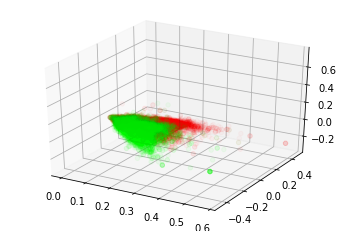

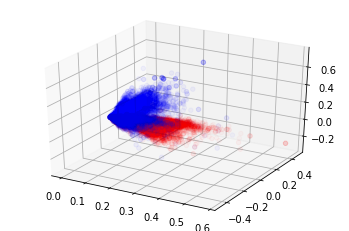

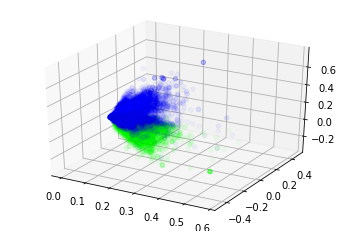

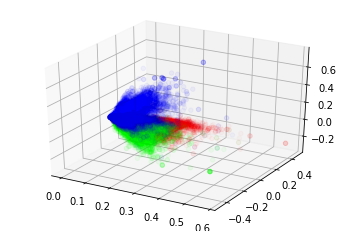

In [28]:
alphas = [('0f', '0f', '00'), ('0f', '00', '0f'), ('00', '0f', '0f'),('0f', '0f', '0f'),]
for alpha in alphas:
    color_map = {'breast+cancer': '#ff0000{}'.format(alpha[0]), 'prostate+cancer' : '#00ff00{}'.format(alpha[1]), 'skin+cancer' : '#0000ff{}'.format(alpha[2])}
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X_reduced[:,0], X_reduced[:,1],X_reduced[:,2], c = [color_map[colour] for colour in labels] )


In [29]:
kn_abstracts = KNeighborsClassifier()
X_train, X_test, y_train, y_test  = train_test_split(X_titles, labels, test_size = 0.1, random_state = 0)
kn_abstracts.fit(X_train, y_train)
print("Accuracy on Test: ", kn_abstracts.score(X_test, y_test))
print("Accuracy on Train: ", kn_abstracts.score(X_train, y_train))


Accuracy on Test:  0.7567750677506775
Accuracy on Train:  0.8457803207106829


## 3D Plots of dimensionality reduced representations of the corpus with corpus specific stop word removal

In [30]:
my_tf_idf = tf_idf.TFIDF()
my_tf_idf.create_model(max_df=0.6)

Estimated Remaining Runtime 505.1752672 seconds
Estimated Remaining Runtime 437.97554075000005 seconds
Estimated Remaining Runtime 401.8917476 seconds
Estimated Remaining Runtime 396.112816375 seconds
Estimated Remaining Runtime 381.74575032 seconds
Estimated Remaining Runtime 372.7933779 seconds
Estimated Remaining Runtime 361.46160528571426 seconds
Estimated Remaining Runtime 360.73140756249995 seconds
Estimated Remaining Runtime 353.9389344 seconds
Estimated Remaining Runtime 354.53299419999996 seconds
Estimated Remaining Runtime 348.5924884 seconds
Estimated Remaining Runtime 342.068236125 seconds
Estimated Remaining Runtime 347.027143476923 seconds
Estimated Remaining Runtime 343.3547570785714 seconds
Estimated Remaining Runtime 339.55616616 seconds
Estimated Remaining Runtime 340.23158430625 seconds
Estimated Remaining Runtime 337.191652 seconds
Estimated Remaining Runtime 336.88727804999996 seconds
Estimated Remaining Runtime 337.9642985894737 seconds
Estimated Remaining Runtime

In [31]:
with open('files/my_tf_idf_files/labels.pickle', 'rb') as file: 
    labels = pickle.load(file)
with open('files/my_tf_idf_files/X_titles.pickle', 'rb') as file: 
    X_titles = pickle.load(file)
with open('files/my_tf_idf_files/X_abstract.pickle', 'rb') as file: 
    X_abstract = pickle.load(file)

In [32]:
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=0)
X_reduced = svd.fit_transform(X_titles)

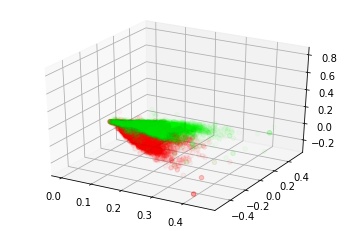

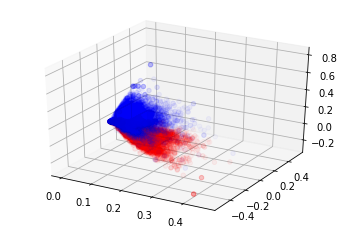

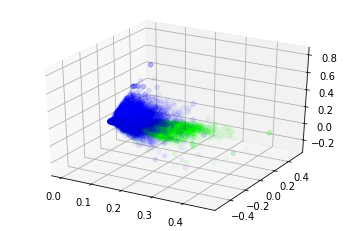

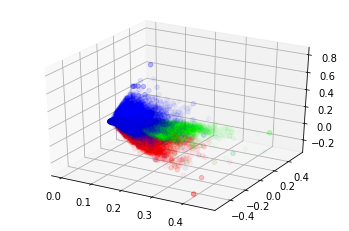

In [33]:
alphas = [('0f', '0f', '00'), ('0f', '00', '0f'), ('00', '0f', '0f'),('0f', '0f', '0f'),]
for alpha in alphas:
    color_map = {'breast+cancer': '#ff0000{}'.format(alpha[0]), 'prostate+cancer' : '#00ff00{}'.format(alpha[1]), 'skin+cancer' : '#0000ff{}'.format(alpha[2])}
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X_reduced[:,0], X_reduced[:,1],X_reduced[:,2], c = [color_map[colour] for colour in labels] )


In [34]:
kn_abstracts = KNeighborsClassifier()
X_train, X_test, y_train, y_test  = train_test_split(X_titles, labels, test_size = 0.1, random_state = 0)
kn_abstracts.fit(X_train, y_train)
print("Accuracy on Test: ", kn_abstracts.score(X_test, y_test))
print("Accuracy on Train: ", kn_abstracts.score(X_train, y_train))


Accuracy on Test:  0.7601626016260162
Accuracy on Train:  0.8461567416999172
